# Walmart Store’s Sales Forecasting using Kaggle data set

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
df = pd.read_csv('GeneralHealth.csv')
df.head(30)

,GeneralHealth,Checkup,Exercise,HeartDisease,SkinCancer,OtherCancer,Depression,Diabetes,Arthritis,Gender,AgeCategory,Height(cm),Weight(kg),BMI,SmokingHistory,AlcoholConsumption,FruitConsumption,GreenVegetablesConsumption,FriedPotatoConsumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0
5,Good,Within the past year,No,No,No,No,Yes,No,Yes,Male,60-64,183,154.22,46.11,No,0,12,12,12
6,Fair,Within the past year,Yes,Yes,No,No,No,No,Yes,Male,60-64,175,69.85,22.74,Yes,0,16,8,0
7,Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,65-69,165,108.86,39.94,Yes,3,30,8,8
8,Fair,Within the past year,No,No,No,No,Yes,No,No,Female,65-69,163,72.57,27.46,Yes,0,12,12,4
9,Fair,Within the past year,No,No,No,No,No,Yes,Yes,Female,70-74,163,91.63,34.67,No,0,12,12,1


In [80]:
df.describe()

,Height(cm),Weight(kg),BMI,AlcoholConsumption,FruitConsumption,GreenVegetablesConsumption,FriedPotatoConsumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GeneralHealth               308854 non-null  object 
 1   Checkup                     308854 non-null  object 
 2   Exercise                    308854 non-null  object 
 3   HeartDisease                308854 non-null  object 
 4   SkinCancer                  308854 non-null  object 
 5   OtherCancer                 308854 non-null  object 
 6   Depression                  308854 non-null  object 
 7   Diabetes                    308854 non-null  object 
 8   Arthritis                   308854 non-null  object 
 9   Gender                      308854 non-null  object 
 10  AgeCategory                 308854 non-null  object 
 11  Height(cm)                  308854 non-null  int64  
 12  Weight(kg)                  308854 non-null  float64
 13  BMI           

In [82]:
df.isnull().sum()


GeneralHealth                 0
Checkup                       0
Exercise                      0
HeartDisease                  0
SkinCancer                    0
OtherCancer                   0
Depression                    0
Diabetes                      0
Arthritis                     0
Gender                        0
AgeCategory                   0
Height(cm)                    0
Weight(kg)                    0
BMI                           0
SmokingHistory                0
AlcoholConsumption            0
FruitConsumption              0
GreenVegetablesConsumption    0
FriedPotatoConsumption        0
dtype: int64

In [83]:
df = df.drop(['Exercise','HeartDisease','SkinCancer'], axis = 1)

In [65]:
df['Weight(kg)'].unique()

array([ 32.66,  77.11,  88.45,  93.44, 154.22,  69.85, 108.86,  72.57,
        91.63,  74.84,  73.48,  83.91, 113.4 ,  52.16, 116.12,  99.79,
        81.65, 104.33,  79.38,  55.79, 124.74,  81.19,  70.31, 112.49,
       147.42,  84.82, 102.06,  64.41,  60.78,  61.23,  88.  ,  90.72,
        49.9 ,  85.28, 120.2 ,  69.4 ,  62.14,  65.77,  89.81,  66.68,
        86.18,  72.12,  87.54,  62.6 ,  75.75,  88.9 ,  92.08,  56.7 ,
        68.04,  79.83,  63.5 ,  58.97, 114.76,  45.36,  73.94,  54.43,
       125.19,  77.56,  96.16,  95.25, 115.67,  82.55, 136.08,  78.93,
        70.76,  95.71,  53.52,  87.09,  55.34,  83.01, 123.38,  98.88,
        73.03,  76.66,  97.52,  71.67,  83.46, 122.47,  58.06,  74.39,
        67.13,  82.1 ,  47.63,  99.34,  85.73, 108.41,  91.17,  57.61,
        63.05,  45.81,  94.35,  44.45, 117.93, 107.5 , 127.01, 106.59,
       107.95,  89.36,  92.99,  53.07,  78.02, 131.09,  97.98,  84.37,
       111.13,  50.8 ,  57.15,  64.86,  80.29,  76.2 , 114.31,  65.32,
      

In [84]:
df = df.drop(['Weight(kg)'], axis = 1)

In [85]:
df.head(5)

,GeneralHealth,Checkup,OtherCancer,Depression,Diabetes,Arthritis,Gender,AgeCategory,Height(cm),BMI,SmokingHistory,AlcoholConsumption,FruitConsumption,GreenVegetablesConsumption,FriedPotatoConsumption
0,Poor,Within the past 2 years,No,No,No,Yes,Female,70-74,150,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,No,Yes,No,Female,70-74,165,28.29,No,0,30,0,4
2,Very Good,Within the past year,No,No,Yes,No,Female,60-64,163,33.47,No,4,12,3,16
3,Poor,Within the past year,No,No,Yes,No,Male,75-79,180,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,Male,80+,191,24.37,Yes,0,8,4,0


# Data Visualisation
Below graph shows count of females and males is almost same

In [86]:
print(df.shape)
df['Gender'].value_counts()

(308854, 15)


Female    160196
Male      148658
Name: Gender, dtype: int64

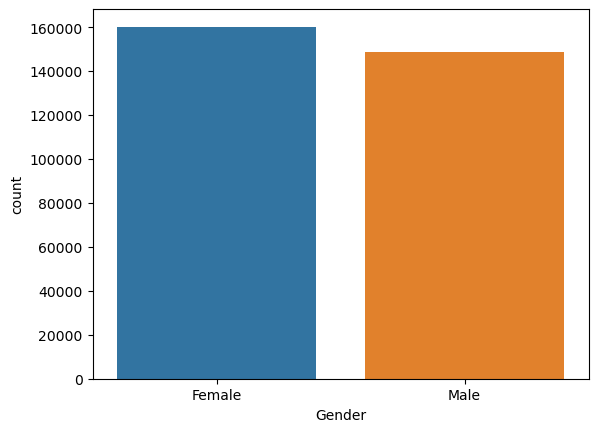

In [87]:
sns.countplot(x ='Gender', data = df)
plt.show()

# Creating dummies for Gender column for getting numeric data for seaborn bar plot

In [88]:
gender_dummies  = pd.get_dummies(df['Gender'])
gender_dummies.head()

,Female,Male
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


# Joining original data frame (df) with gender dummies data frame (gender_dummies)

In [89]:
df = pd.concat([df, gender_dummies], axis = 1)
df.head()

,GeneralHealth,Checkup,OtherCancer,Depression,Diabetes,Arthritis,Gender,AgeCategory,Height(cm),BMI,SmokingHistory,AlcoholConsumption,FruitConsumption,GreenVegetablesConsumption,FriedPotatoConsumption,Female,Male
0,Poor,Within the past 2 years,No,No,No,Yes,Female,70-74,150,14.54,Yes,0,30,16,12,1,0
1,Very Good,Within the past year,No,No,Yes,No,Female,70-74,165,28.29,No,0,30,0,4,1,0
2,Very Good,Within the past year,No,No,Yes,No,Female,60-64,163,33.47,No,4,12,3,16,1,0
3,Poor,Within the past year,No,No,Yes,No,Male,75-79,180,28.73,No,0,30,30,8,0,1
4,Good,Within the past year,No,No,No,No,Male,80+,191,24.37,Yes,0,8,4,0,0,1


<Axes: xlabel='Checkup', ylabel='Female'>

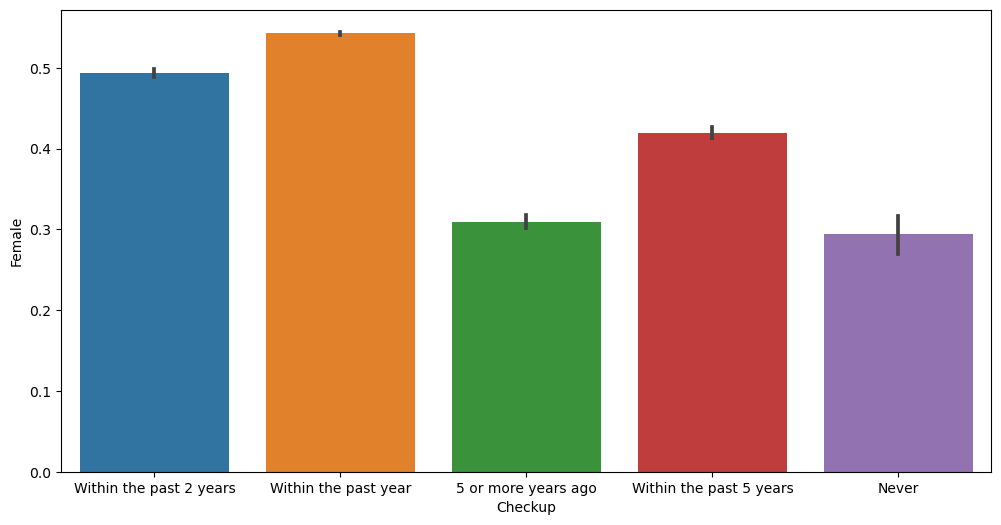

In [74]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Checkup', y = 'Female', data = df)

<Axes: xlabel='Checkup', ylabel='Male'>

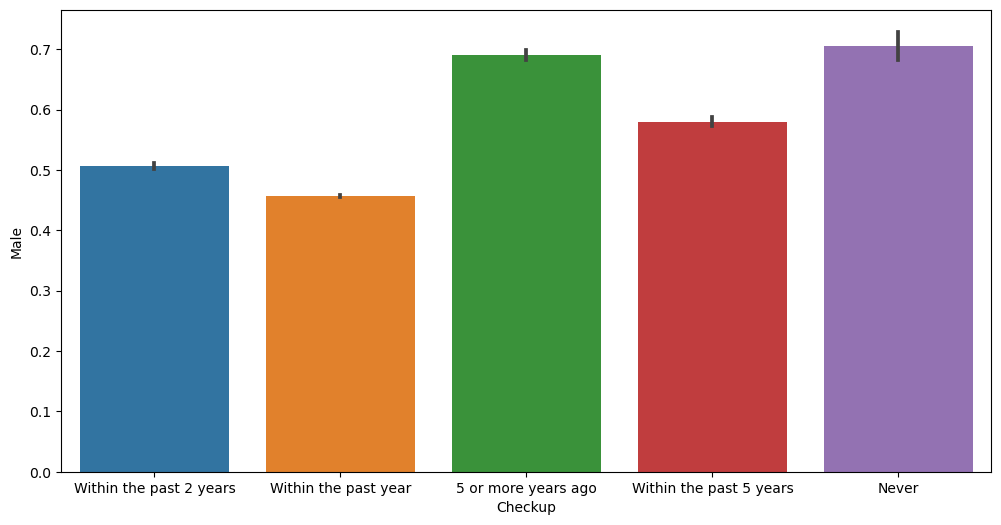

In [90]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Checkup', y = 'Male', data = df)

Plotting Customers  GeneralHealth

In [111]:
Place_df=pd.DataFrame(df['GeneralHealth'].value_counts())
Place_df

,GeneralHealth
Very Good,110395
Good,95364
Excellent,55954
Fair,35810
Poor,11331


<Axes: ylabel='GeneralHealth'>

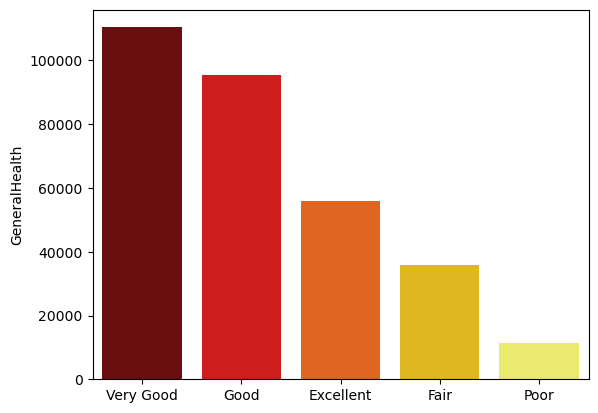

In [115]:
sns.barplot(x = Place_df.index  , y = Place_df['GeneralHealth'], palette = 'hot')

# Plotting different GreenVegetablesConsumption count

In [117]:
GreenVegetablesConsumption_df = pd.DataFrame(df['GreenVegetablesConsumption'].value_counts())
GreenVegetablesConsumption_df

,GreenVegetablesConsumption
30,51162
12,41979
8,40329
4,37709
16,23338
...,...
34,1
93,1
128,1
37,1


<Axes: ylabel='GreenVegetablesConsumption'>

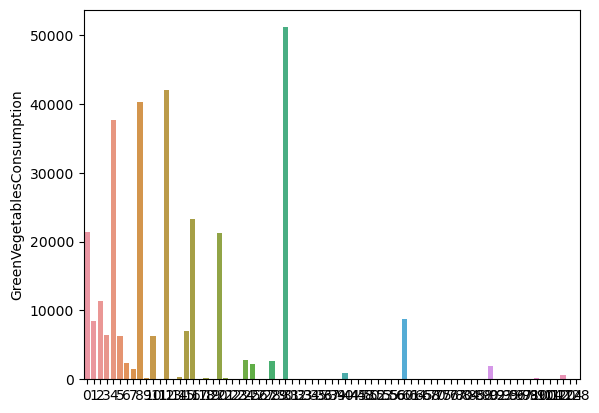

In [119]:
sns.barplot(x =GreenVegetablesConsumption_df.index , y = GreenVegetablesConsumption_df.GreenVegetablesConsumption)


([<matplotlib.axis.XTick at 0x2ab0ddc1150>,
 [Text(0, 0, '70-74'),
  Text(1, 0, '60-64'),
  Text(2, 0, '75-79'),
  Text(3, 0, '80+'),
  Text(4, 0, '65-69'),
  Text(5, 0, '50-54'),
  Text(6, 0, '45-49'),
  Text(7, 0, '18-24'),
  Text(8, 0, '30-34'),
  Text(9, 0, '55-59'),
  Text(10, 0, '35-39')])

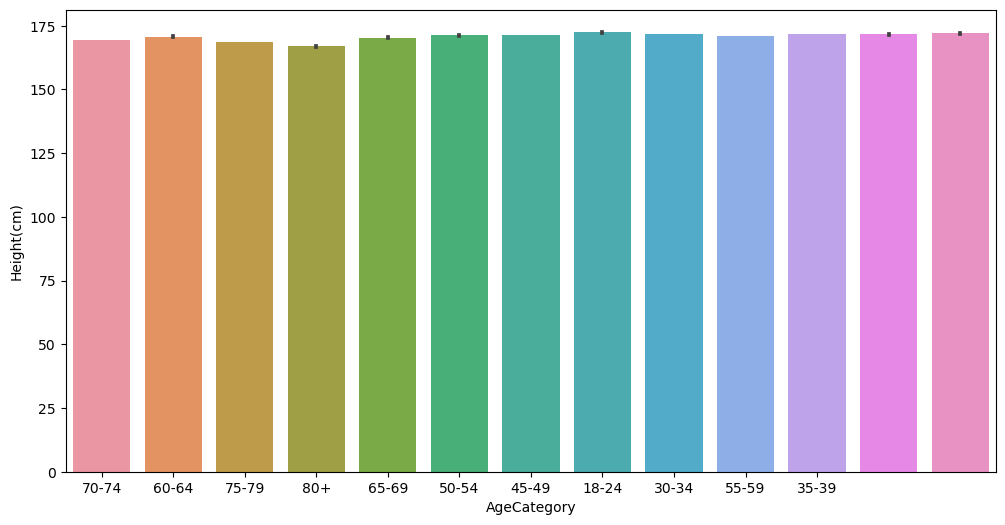

In [121]:
#Getting Height(cm) Plot for each AgeCategory line

xdata = [0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.barplot(y = df['Height(cm)'], x = df['AgeCategory'])
plt.xticks(xdata)

# FruitConsumption and Checkup differences

<Axes: xlabel='Checkup', ylabel='FruitConsumption'>

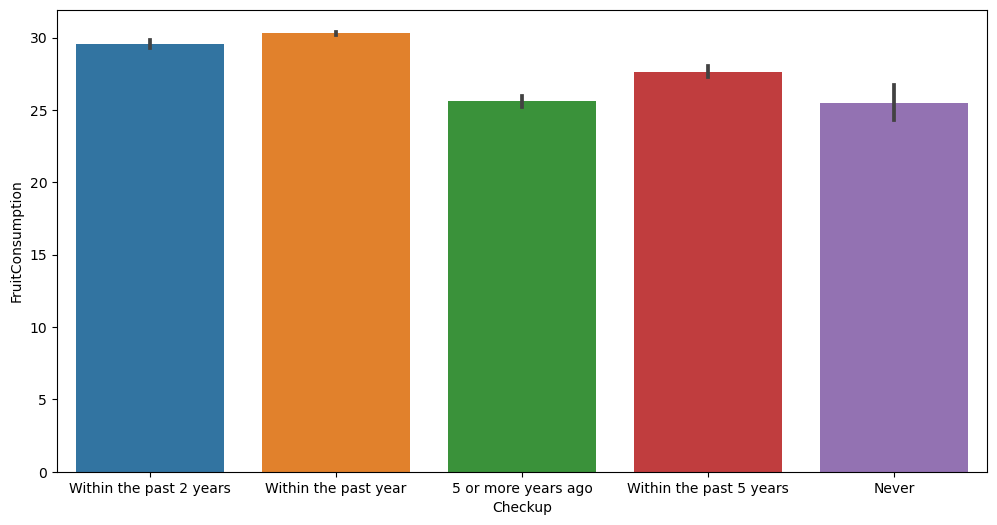

In [132]:
plt.figure(figsize = (12,6))
sns.barplot(x = df['Checkup'] , y = df['FruitConsumption'])

# Exploring AlcoholConsumption Column

C:\Users\HP\AppData\Local\Temp\ipykernel_16076\3433575521.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AlcoholConsumption'])


([<matplotlib.axis.XTick at 0x2ab069d06d0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

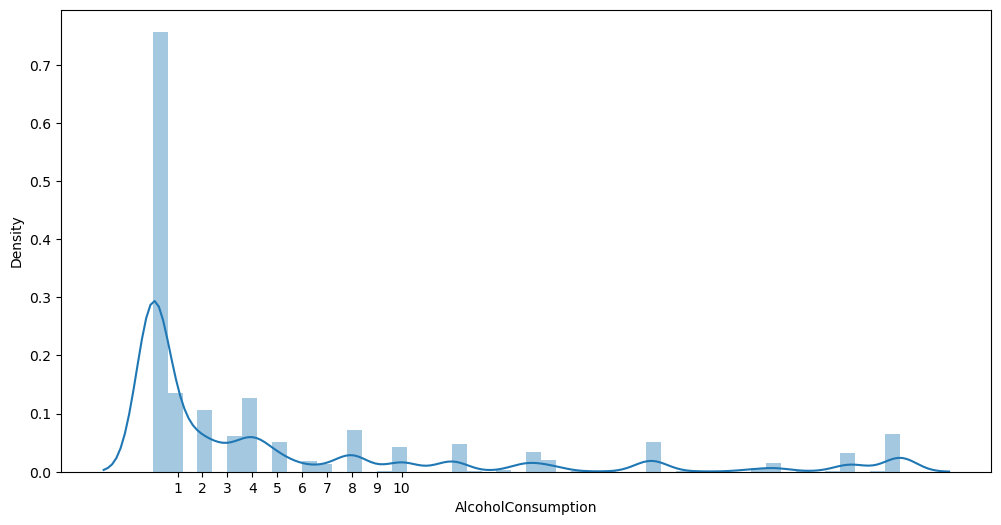

In [133]:
xdata = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.distplot(df['AlcoholConsumption'])
plt.xticks(xdata)

In [134]:
quantity_df = pd.DataFrame(df['AlcoholConsumption'].value_counts())
quantity_df

,AlcoholConsumption
0,140262
1,24983
4,23367
2,19740
8,13438
30,11976
3,11479
5,9622
20,9372
12,8825


<Axes: ylabel='AlcoholConsumption'>

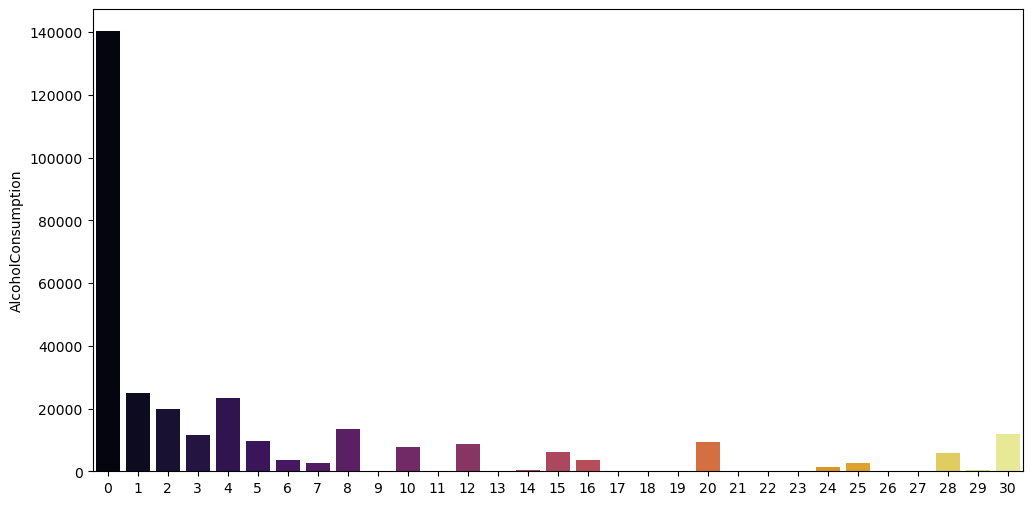

In [137]:
plt.figure(figsize=(12,6))
sns.barplot(x = quantity_df.index , y = quantity_df['AlcoholConsumption'] , palette = 'inferno')

# Plotting heatmap to check if any correlation between columns

C:\Users\HP\AppData\Local\Temp\ipykernel_16076\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

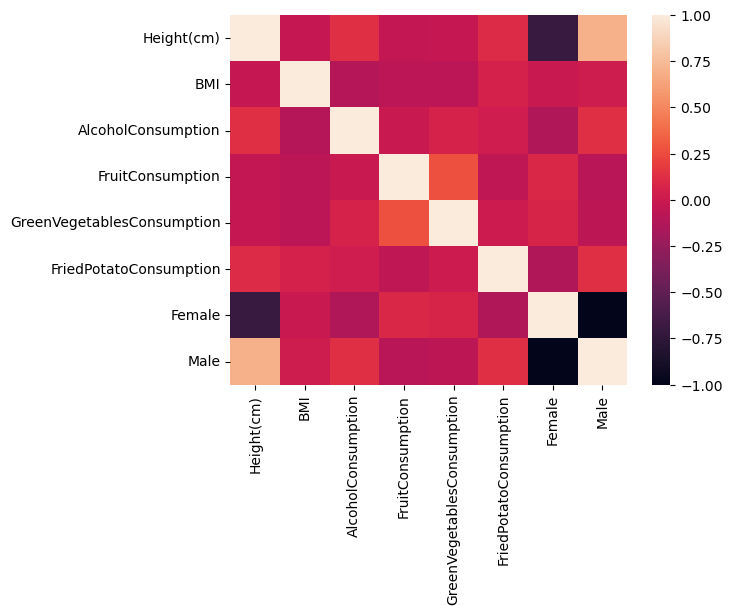

In [138]:
sns.heatmap(df.corr())